# Group Project: Part 1 | Due July 14th

### Name: <font color='blue'> Sarah White </font>
### Partner Name: <font color='red'> Nathan Wilson </font>

## Import Statements and URL

In [1]:
import requests
from bs4 import BeautifulSoup

url = "https://en.m.wikipedia.org/wiki/List_of_best-selling_PlayStation_4_video_games"
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

## Here is the HTML that we get.
This is an overwhelming amount of code even when pretty-fied!

In [2]:
print(soup.prettify())

<!DOCTYPE html>
<html class="client-nojs skin-theme-clientpref-day mf-expand-sections-clientpref-0 mf-font-size-clientpref-small mw-mf-amc-clientpref-0" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   List of best-selling PlayStation 4 video games - Wikipedia
  </title>
  <script>
   (function(){var className="client-js skin-theme-clientpref-day mf-expand-sections-clientpref-0 mf-font-size-clientpref-small mw-mf-amc-clientpref-0";var cookie=document.cookie.match(/(?:^|; )enwikimwclientpreferences=([^;]+)/);if(cookie){cookie[1].split('%2C').forEach(function(pref){className=className.replace(new RegExp('(^| )'+pref.replace(/-clientpref-\w+$|[^\w-]+/g,'')+'-clientpref-\\w+( |$)'),'$1'+pref+'$2');});}document.documentElement.className=className;}());RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","

## Here is the wikitable that we have.
This is still an overwhelming amount of data, but we have narrowed it down to a single table by using beautifulsoup.

In [3]:
tables = soup.find_all('table', class_='wikitable')
first_table = tables[0]
print(first_table)

<table class="wikitable plainrowheaders sortable static-row-numbers">
<caption>List of best-selling PlayStation 4 video games
</caption>
<tbody><tr>
<th scope="col">Game
</th>
<th scope="col">Copies sold
</th>
<th scope="col">Release date<sup class="reference" id="cite_ref-1"><a href="#cite_note-1">[a]</a></sup>
</th>
<th scope="col">Genre(s)
</th>
<th scope="col">Developer(s)
</th>
<th scope="col">Publisher(s)
</th></tr>
<tr>
<td><i><a href="/wiki/Spider-Man_(2018_video_game)" title="Spider-Man (2018 video game)">Marvel's Spider-Man</a></i>
</td>
<td><span data-sort-value="7001200000000000000♠">20</span><span class="nowrap"> </span>million<sup class="reference" id="cite_ref-2"><a href="#cite_note-2">[1]</a></sup><sup class="reference" id="cite_ref-4"><a href="#cite_note-4">[b]</a></sup>
</td>
<td><span data-sort-value="000000002018-09-07-0000" style="white-space:nowrap">September 7, 2018</span>
</td>
<td>Action-adventure
</td>
<td><a href="/wiki/Insomniac_Games" title="Insomniac Games

<div class="alert alert-block alert-info">
    <b>JUST TO CLARIFY:</b>
    The specific table found is <b>table class="wikitable plainrowheaders sortable static-row-numbers"</b> and will be used from now on.</div>

## Create empty lists to hold parsed data.

In [4]:
if response.status_code == 200:
    soup = BeautifulSoup(response.content, 'html.parser')

    # Initialize empty lists for each column
    games = []
    copies_sold = []
    release_dates = []
    genres = []
    developers = []
    publishers = []
    
# Input validation just in case
else:
    print("Failed to retrieve the webpage.")

## Find the first table, validates each row and appends data to lists.

In [5]:
import re

table = soup.find('table', class_='wikitable plainrowheaders sortable static-row-numbers')
    
if tables:
    rows = tables[0].find_all('tr')
        
    for row in rows[1:]:  # Skips header row as it is not needed
        cells = row.find_all(['td', 'th'])
            
        if len(cells) == 6:  # Row validation
            game = cells[0].get_text(strip=True)
            copy_sold_raw = cells[1].get_text(strip=True)
            release_date = cells[2].get_text(strip=True)
            genre = cells[3].get_text(strip=True)
            developer = cells[4].get_text(strip=True)
            publisher = cells[5].get_text(strip=True)
            
            # Clean up copies sold using regex
            copy_sold_clean = re.sub(r'\[.*?\]', '', copy_sold_raw)
            #copy_sold_clean = copy_sold_clean.strip()
                
            # Append data to lists
            games.append(game)
            copies_sold.append(copy_sold_clean)
            release_dates.append(release_date)
            genres.append(genre)
            developers.append(developer)
            publishers.append(publisher)

## Print list the verify contents.
The data is in each list! It still is hard to read though and everything is seperated.

In [6]:
print("Games:", games)
print()
print("Copies Sold:", copies_sold)
print()
print("Release Dates:", release_dates)
print()
print("Genres:", genres)
print()
print("Developers:", developers)
print()
print("Publishers:", publishers)

Games: ["Marvel's Spider-Man", 'Grand Theft Auto V', 'God of War', "Uncharted 4: A Thief's End", 'Gran Turismo Sport', 'The Witcher 3: Wild Hunt', 'The Last of Us Part II', 'Horizon Zero Dawn', 'The Last of Us Remastered', 'Ghost of Tsushima', 'Star Wars Battlefront', 'Bloodborne', 'Days Gone', 'Ratchet & Clank', 'Infamous Second Son', 'Detroit: Become Human', 'Final Fantasy VII Remake', 'Monster Hunter: World', 'Cyberpunk 2077', 'FIFA 17', 'Nier: Automata', 'Crash Bandicoot N. Sane Trilogy', 'Final Fantasy XV', 'FIFA 18', 'Persona 5 Royal', 'Killzone: Shadow Fall', 'Driveclub', 'Knack', 'Minecraft: PlayStation 4 Edition', 'FIFA 20', 'Nioh 2', 'FIFA 19', 'Battlefield 1', 'Dragon Quest XI: Echoes of an Elusive Age', 'Final Fantasy XII: The Zodiac Age', 'FIFA 22', 'FIFA 21', 'Metal Gear Solid V: The Phantom Pain', 'Kingdom Hearts III', 'Nioh']

Copies Sold: ['20million', '20million', '19.5million', '16million', '12.72million', '10.8million', '10million', '10million', '10million', '9.73mi

## Use an index to print a row and validate table/row lengths
I chose my favorite game, "The Last of Us Part II". All of the information that is printed is accurate!

<div class="alert alert-block alert-warning">
    <b>ATTENTION:</b> I was having a problem with my data repeating itself. If you run into this, go back to the beggining and run all of the cells again. I can't figure out another solution. <b>The total amount of everything should be 40 items.</b></div>

In [7]:
i = 6 # Index of the row you want to print. You can choose any number you want up to 39.

print(games[i])
print(f'Copies Sold: {copies_sold[i]}')
print(f'Release Date: {release_dates[i]}')
print(f'Genre: {genres[i]}')
print(f'Developer: {developers[i]}')
print(f'Publisher: {publishers[i]}')
print()
print("Length of games list:", len(games))
print("Length of copies_sold list:", len(copies_sold))
print("Length of release_dates list:", len(release_dates))
print("Length of genres list:", len(genres))
print("Length of developers list:", len(developers))
print("Length of publishers list:", len(publishers))

The Last of Us Part II
Copies Sold: 10million
Release Date: June 19, 2020
Genre: Action-adventuresurvival horror
Developer: Naughty Dog
Publisher: Sony Interactive Entertainment

Length of games list: 40
Length of copies_sold list: 40
Length of release_dates list: 40
Length of genres list: 40
Length of developers list: 40
Length of publishers list: 40


## Push the data to a dataframe using PANDAS

In [8]:
import pandas as pd

df = pd.DataFrame(games, columns=['Game'])
df['Copies Sold'] = copies_sold
df['Release Date'] = release_dates
df['Genre'] = genres
df['Developer'] = developers
df['Publisher'] = publishers

df

,Game,Copies Sold,Release Date,Genre,Developer,Publisher
0,Marvel's Spider-Man,20million,"September 7, 2018",Action-adventure,Insomniac Games,Sony Interactive Entertainment
1,Grand Theft Auto V,20million,"November 18, 2014",Action-adventure,Rockstar North,Rockstar Games
2,God of War,19.5million,"April 20, 2018",Action-adventurehack and slash,Santa Monica Studio,Sony Interactive Entertainment
3,Uncharted 4: A Thief's End,16million,"May 10, 2016",Action-adventure,Naughty Dog,Sony Interactive Entertainment
4,Gran Turismo Sport,12.72million,"October 17, 2017",Racing,Polyphony Digital,Sony Interactive Entertainment
5,The Witcher 3: Wild Hunt,10.8million,"May 18, 2015",Action role-playing,CD Projekt Red,CD Projekt
6,The Last of Us Part II,10million,"June 19, 2020",Action-adventuresurvival horror,Naughty Dog,Sony Interactive Entertainment
7,Horizon Zero Dawn,10million,"February 28, 2017",Action role-playing,Guerrilla Games,Sony Interactive Entertainment
8,The Last of Us Remastered,10million,"July 29, 2014",Action-adventuresurvival horror,Naughty Dog,Sony Computer Entertainment
9,Ghost of Tsushima,9.73million,"July 17, 2020",Action-adventurestealth,Sucker Punch Productions,Sony Interactive Entertainment


## Save this data to a CSV file.

I included some validation statements.

In [9]:
import os  # Import the os module to work with file paths

file_path = 'CSC221-webscrape-data.csv'

df.to_csv(file_path, index=False)

if os.path.exists(file_path):
    print(f"CSV file saved successfully: '{file_path}'")
else:
    print(f"Error saving CSV file: Could not save '{file_path}'")

CSV file saved successfully: 'CSC221-webscrape-data.csv'


# PART 2 Plotting

In [10]:
# Read the CSV file into a data frame
df = pd.read_csv(file_path)
df

,Game,Copies Sold,Release Date,Genre,Developer,Publisher
0,Marvel's Spider-Man,20million,"September 7, 2018",Action-adventure,Insomniac Games,Sony Interactive Entertainment
1,Grand Theft Auto V,20million,"November 18, 2014",Action-adventure,Rockstar North,Rockstar Games
2,God of War,19.5million,"April 20, 2018",Action-adventurehack and slash,Santa Monica Studio,Sony Interactive Entertainment
3,Uncharted 4: A Thief's End,16million,"May 10, 2016",Action-adventure,Naughty Dog,Sony Interactive Entertainment
4,Gran Turismo Sport,12.72million,"October 17, 2017",Racing,Polyphony Digital,Sony Interactive Entertainment
5,The Witcher 3: Wild Hunt,10.8million,"May 18, 2015",Action role-playing,CD Projekt Red,CD Projekt
6,The Last of Us Part II,10million,"June 19, 2020",Action-adventuresurvival horror,Naughty Dog,Sony Interactive Entertainment
7,Horizon Zero Dawn,10million,"February 28, 2017",Action role-playing,Guerrilla Games,Sony Interactive Entertainment
8,The Last of Us Remastered,10million,"July 29, 2014",Action-adventuresurvival horror,Naughty Dog,Sony Computer Entertainment
9,Ghost of Tsushima,9.73million,"July 17, 2020",Action-adventurestealth,Sucker Punch Productions,Sony Interactive Entertainment


In [11]:
# Extract the numbers from the Copies Sold field
millionsSold = [x.replace('million', '') for x in df['Copies Sold']]
millionsSold

['20',
 '20',
 '19.5',
 '16',
 '12.72',
 '10.8',
 '10',
 '10',
 '10',
 '9.73',
 '8.42',
 '7.46 ',
 '7.32 milllion',
 '7',
 '6',
 '5.5',
 '5',
 '4.67',
 '3.83',
 '3.12',
 '2.6',
 '2.5',
 '2.5',
 '2.47',
 '2.3',
 '2.1',
 '2',
 '2',
 '2',
 '1.76',
 '1.46',
 '1.45',
 '1.3',
 '1.3',
 '1.2',
 '1.16',
 '1.12',
 '1.1',
 '1',
 '1']

In [12]:
# The data has a misspelled milllions and inconsistent spaces, so use a regular expression
millionsSold = [float(re.findall('[0-9.]+', x)[0]) for x in df['Copies Sold']]
millionsSold

[20.0,
 20.0,
 19.5,
 16.0,
 12.72,
 10.8,
 10.0,
 10.0,
 10.0,
 9.73,
 8.42,
 7.46,
 7.32,
 7.0,
 6.0,
 5.5,
 5.0,
 4.67,
 3.83,
 3.12,
 2.6,
 2.5,
 2.5,
 2.47,
 2.3,
 2.1,
 2.0,
 2.0,
 2.0,
 1.76,
 1.46,
 1.45,
 1.3,
 1.3,
 1.2,
 1.16,
 1.12,
 1.1,
 1.0,
 1.0]

In [13]:
# Extract the dates from the Release Date
import datetime
releaseDate = [datetime.datetime.strptime(x, '%B %d, %Y') for x in df['Release Date']]
releaseDate

[datetime.datetime(2018, 9, 7, 0, 0),
 datetime.datetime(2014, 11, 18, 0, 0),
 datetime.datetime(2018, 4, 20, 0, 0),
 datetime.datetime(2016, 5, 10, 0, 0),
 datetime.datetime(2017, 10, 17, 0, 0),
 datetime.datetime(2015, 5, 18, 0, 0),
 datetime.datetime(2020, 6, 19, 0, 0),
 datetime.datetime(2017, 2, 28, 0, 0),
 datetime.datetime(2014, 7, 29, 0, 0),
 datetime.datetime(2020, 7, 17, 0, 0),
 datetime.datetime(2015, 11, 17, 0, 0),
 datetime.datetime(2015, 3, 24, 0, 0),
 datetime.datetime(2019, 4, 26, 0, 0),
 datetime.datetime(2016, 4, 12, 0, 0),
 datetime.datetime(2014, 3, 21, 0, 0),
 datetime.datetime(2018, 5, 25, 0, 0),
 datetime.datetime(2020, 4, 10, 0, 0),
 datetime.datetime(2018, 1, 26, 0, 0),
 datetime.datetime(2020, 12, 10, 0, 0),
 datetime.datetime(2016, 9, 27, 0, 0),
 datetime.datetime(2017, 2, 23, 0, 0),
 datetime.datetime(2017, 6, 30, 0, 0),
 datetime.datetime(2016, 11, 29, 0, 0),
 datetime.datetime(2017, 9, 29, 0, 0),
 datetime.datetime(2019, 10, 31, 0, 0),
 datetime.datetime(2

In [14]:
#
df['Millions'] = millionsSold
df['Date'] = releaseDate
df[['Game', 'Copies Sold', 'Millions', 'Release Date', 'Date',  'Genre']]

,Game,Copies Sold,Millions,Release Date,Date,Genre
0,Marvel's Spider-Man,20million,20.00,"September 7, 2018",2018-09-07,Action-adventure
1,Grand Theft Auto V,20million,20.00,"November 18, 2014",2014-11-18,Action-adventure
2,God of War,19.5million,19.50,"April 20, 2018",2018-04-20,Action-adventurehack and slash
3,Uncharted 4: A Thief's End,16million,16.00,"May 10, 2016",2016-05-10,Action-adventure
4,Gran Turismo Sport,12.72million,12.72,"October 17, 2017",2017-10-17,Racing
5,The Witcher 3: Wild Hunt,10.8million,10.80,"May 18, 2015",2015-05-18,Action role-playing
6,The Last of Us Part II,10million,10.00,"June 19, 2020",2020-06-19,Action-adventuresurvival horror
7,Horizon Zero Dawn,10million,10.00,"February 28, 2017",2017-02-28,Action role-playing
8,The Last of Us Remastered,10million,10.00,"July 29, 2014",2014-07-29,Action-adventuresurvival horror
9,Ghost of Tsushima,9.73million,9.73,"July 17, 2020",2020-07-17,Action-adventurestealth


In [15]:
# How many Genres?
df[['Genre','Game']].groupby('Genre').count()

,Game
Genre,
Action role-playing,11
Action-adventure,5
Action-adventurehack and slash,1
Action-adventurestealth,2
Action-adventuresurvival horror,2
Adventure,1
First-person shooter,2
First-person shooterthird-person shooter,1
Platform,1


In [16]:
# Group them into fewer categories
genre = []
for x in df['Genre']:
    if re.search('[Rr]ole', x):
        genre.append('RPG')
    elif re.search('[Aa]ction', x):
        genre.append('Action')
    elif re.search('[Ss]hooter', x):
        genre.append('Shooter')
    elif re.search('[Ss]ports', x):
        genre.append('Sports')
    else:
        genre.append('Other')

df['GENRE'] = genre
df[['GENRE','Game']].groupby('GENRE').count()

,Game
GENRE,
Action,10
Other,6
RPG,14
Shooter,4
Sports,6


In [17]:
df[['Game', 'Copies Sold', 'Millions', 'Release Date', 'Date',  'Genre', 'GENRE']]

,Game,Copies Sold,Millions,Release Date,Date,Genre,GENRE
0,Marvel's Spider-Man,20million,20.00,"September 7, 2018",2018-09-07,Action-adventure,Action
1,Grand Theft Auto V,20million,20.00,"November 18, 2014",2014-11-18,Action-adventure,Action
2,God of War,19.5million,19.50,"April 20, 2018",2018-04-20,Action-adventurehack and slash,Action
3,Uncharted 4: A Thief's End,16million,16.00,"May 10, 2016",2016-05-10,Action-adventure,Action
4,Gran Turismo Sport,12.72million,12.72,"October 17, 2017",2017-10-17,Racing,Other
5,The Witcher 3: Wild Hunt,10.8million,10.80,"May 18, 2015",2015-05-18,Action role-playing,RPG
6,The Last of Us Part II,10million,10.00,"June 19, 2020",2020-06-19,Action-adventuresurvival horror,Action
7,Horizon Zero Dawn,10million,10.00,"February 28, 2017",2017-02-28,Action role-playing,RPG
8,The Last of Us Remastered,10million,10.00,"July 29, 2014",2014-07-29,Action-adventuresurvival horror,Action
9,Ghost of Tsushima,9.73million,9.73,"July 17, 2020",2020-07-17,Action-adventurestealth,Action


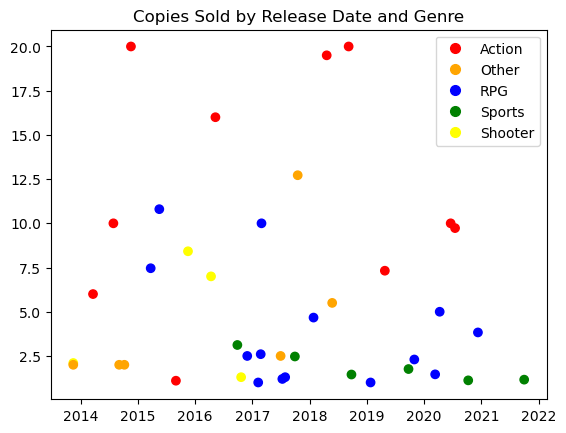

In [21]:
# Time to Plot
import matplotlib.pyplot as plot
from matplotlib.lines import Line2D
colorTable = {'Action': 'red', 'Other': 'orange', 'RPG': 'blue', 'Sports': 'green', 'Shooter': 'yellow'}
colors = [colorTable[x] for x in df['GENRE']]
plot.scatter(df['Date'], df['Millions'], c=colors)
plot.title('Copies Sold by Release Date and Genre')
lines = [Line2D([0], [0], color=c, marker='o', markersize=7, linestyle='') for c in colorTable.values()]
labels = colorTable.keys()
plot.legend(lines, labels)

Text(0.5, 1.0, 'Aggregate Copies Sold by Genre')

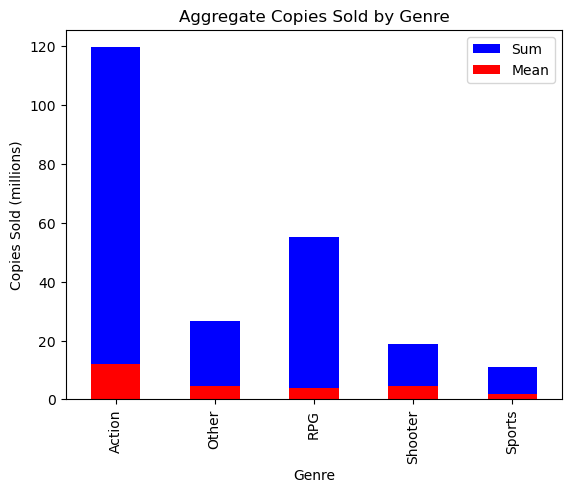

In [19]:
# Average and Total Copies Sold by Genre
sum = df[['GENRE', 'Millions']].groupby('GENRE')['Millions'].sum()
avg = df[['GENRE', 'Millions']].groupby('GENRE')['Millions'].mean()
sum.plot(kind='bar', label='Sum', color='b')
avg.plot(kind='bar', label='Mean', color='r')
plot.xlabel("Genre")
plot.ylabel("Copies Sold (millions)")
plot.legend()
plot.title('Aggregate Copies Sold by Genre')
#plot.tight_layout()

Text(0.5, 1.0, 'Genre by Release Date')

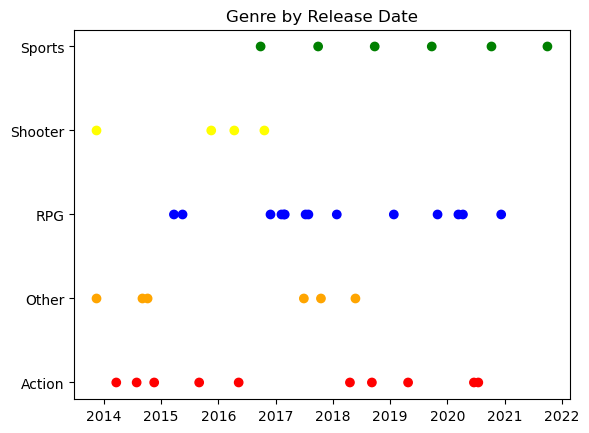

In [20]:
colorTable = {'Action': 'red', 'Other': 'orange', 'RPG': 'blue', 'Sports': 'green', 'Shooter': 'yellow'}
colors = [colorTable[x] for x in df['GENRE']]
plot.scatter(df['Date'], df['GENRE'], c=colors)
plot.title('Genre by Release Date')